<a href="https://colab.research.google.com/github/nurfaizah19/3333210043_Nur-Faizah_Kelas-C/blob/main/3333210043_Nur_Faizah_Kelas_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

Nokia Corporation is a Finnish multinational telecommunications, information technology, and consumer electronics corporation, established in 1865. Nokia's main headquarters are in Espoo, Finland, in the greater Helsinki metropolitan area, but the company's actual roots are in the Tampere region of Pirkanmaa.

The dataset is very small and that is the most challenging part here, with limited data, can you accurately predict future sales?

The dataset contains Nokia_Dataset.csv which includes sales from the year 1999 to 2021 along with two additional features, number of employees and net income (profit or loss).

Dataset description & download https://www.kaggle.com/datasets/muhammad4hmed/can-you-predict-nokias-downfall

**1.1 Importing Library**

Untuk mengimport library dapat menggunakan *syntax* berikut:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

**1.2 Importing Dataset**

Untuk mengimport dataset dari google drive dapat menggunakan *syntax* berikut:

In [2]:
!gdown 1HoZr1OgKuoeFfQ3jVRjbQNEV5s24o7eh

Downloading...
From: https://drive.google.com/uc?id=1HoZr1OgKuoeFfQ3jVRjbQNEV5s24o7eh
To: /content/Nokia_Dataset.csv
100% 842/842 [00:00<00:00, 2.49MB/s]


In [3]:
import pandas as pd
dataset = pd.read_csv('/content/Nokia_Dataset.csv')
dataset

,Year,Number of Employees,Net Sales in Euro,Net Income in Euro
0,2021,87900.0,22200000000,1.623000e+09
1,2020,92040.0,21850000000,-2.431000e+09
2,2019,98320.0,23320000000,7.000000e+06
3,2018,103080.0,22560000000,-3.400000e+08
4,2017,102760.0,23150000000,-1.494000e+09
5,2016,100880.0,23640000000,-7.660000e+08
6,2015,55720.0,12500000000,2.466000e+09
7,2014,55400.0,11760000000,3.462000e+09
8,2013,58900.0,12710000000,-6.150000e+08
9,2012,97800.0,30180000000,-3.105000e+09


## 2. Exploratory Data

Untuk mendapatkan jumlah baris dan jumlah kolom dari suatu dataset dapat menggunakan *syntax* berikut:

In [4]:
dataset.shape

(23, 4)

Berdasarkan hasil diatas dapat diketahui dalam dataset ini terdapat 23 kolom dan 4 baris data

Untuk melihat daftar yang berisi nama-nama kolom dari suatu dataset dapat menggunakan *syntax* berikut:

In [5]:
dataset.columns

Index(['Year', 'Number of Employees', 'Net Sales in Euro',
       'Net Income in Euro'],
      dtype='object')

Berdasarkan hasil diatas dapat diketahui bahwa nama-nama kolom dalam dataset ini yaitu Year, Number of Employees, Net Sales in Euro, dan Net Income in Euro

Untuk melihat tipe data dari masing-masing kolom dapat menggunakan *syntax* berikut:

In [6]:
dataset.dtypes

Year                     int64
Number of Employees    float64
Net Sales in Euro        int64
Net Income in Euro     float64
dtype: object

Berdasarkan hasil diatas dapat diketahui bahwa kolom Year bertipe data int64, kolom Number of Employees bertipe data float64, kolom Net Sales in Euro bertipe data int64, dan kolom Net Income in Euro bertipe data float64

Untuk melihat ringkasan informasi mengenai suatu dataset dapat menggunakan *syntax* berikut:

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 23 non-null     int64  
 1   Number of Employees  17 non-null     float64
 2   Net Sales in Euro    23 non-null     int64  
 3   Net Income in Euro   16 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 864.0 bytes


Untuk mendapatkan jumlah nilai unik dari setiap kolom dalam suatu dataset dapat menggunakan *syntax* berikut:

In [8]:
dataset.nunique()

Year                   23
Number of Employees    17
Net Sales in Euro      23
Net Income in Euro     16
dtype: int64

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

Untuk menampilkan jumlah nilai yang hilang (null) dalam setiap kolom dataset, maka dapat menggunakan *syntax* berikut:

In [9]:
dataset.isnull().sum()

Year                   0
Number of Employees    6
Net Sales in Euro      0
Net Income in Euro     7
dtype: int64

Berdasarkan hasil diatas diketahui bahwa kolom Year dan Net Sales in Euro tidak memiliki missing value, sedangkan kolom Number of Empployees dan Net Income in Euro memiliki missing value masing-masing sebanyak 6 dan 7.

*Syntax* berikut digunakan untuk mengetahui tipe data dari kolom yang memiliki missing value:

In [10]:
dataset['Number of Employees'].dtypes

dtype('float64')

In [11]:
dataset['Net Income in Euro'].dtypes

dtype('float64')

Berdasarkan hasil diatas dapat diketahui bahwa kolom Number of Employees dan Net Income in Euro sama-sama bertipe data float64

Perform imputer to handle missing value in numerical data

In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [13]:
imputer = imputer.fit(dataset[['Number of Employees', 'Net Income in Euro']])
imputer

SimpleImputer()

In [14]:
dataset[['Number of Employees', 'Net Income in Euro']] = imputer.transform(dataset[['Number of Employees', 'Net Income in Euro']])
dataset.isnull().sum()

Year                   0
Number of Employees    0
Net Sales in Euro      0
Net Income in Euro     0
dtype: int64

Using drop column to handle missing value on categorical or object data

In [15]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

Year                   0
Number of Employees    0
Net Sales in Euro      0
Net Income in Euro     0
dtype: int64

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

In [16]:
dataset = dataset.drop('Date', axis=1)
dataset

KeyError: ignored

## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

Untuk menghasilkan ringkasan statistik deskriptif dari setiap kolom dalam suatu dataset dapat menggunakan *syntax* berikut:

In [17]:
dataset.describe()

,Year,Number of Employees,Net Sales in Euro,Net Income in Euro
count,23.00000,23.000000,2.300000e+01,2.300000e+01
mean,2010.00000,94368.823529,2.927391e+10,9.926875e+08
std,6.78233,22710.952480,1.110167e+10,2.293532e+09
min,1999.00000,55400.000000,1.176000e+10,-3.105000e+09
25%,2004.50000,89970.000000,2.238000e+10,-4.775000e+08
50%,2010.00000,94368.823529,2.953000e+10,9.926875e+08
75%,2015.50000,102920.000000,3.642500e+10,1.736500e+09
max,2021.00000,132430.000000,5.106000e+10,7.205000e+09


Membuat visualisasi grafik dari data dalam suatu dataset menggunakan *syntax* berikut:

<Axes: >

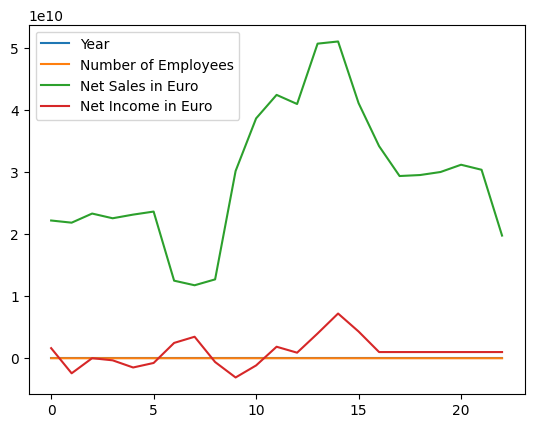

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

Membuat visualisasi grafik yang lebih menarik dan informatif dibandingkan dengan plot standar yang dihasilkan library matplotlib dapat menggunakan *syntax* berikut:

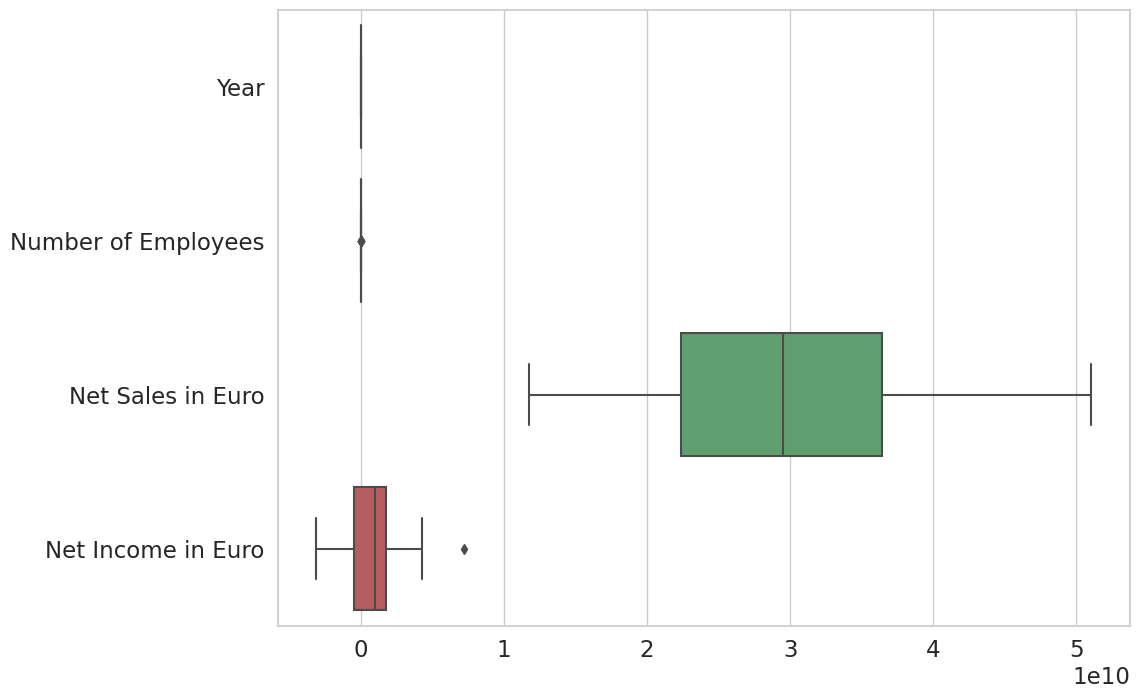

In [19]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

Untuk menampilkan scatter plot dari kolom dataset yang memiliki missing value maka digunakanlah *syntax* berikut:

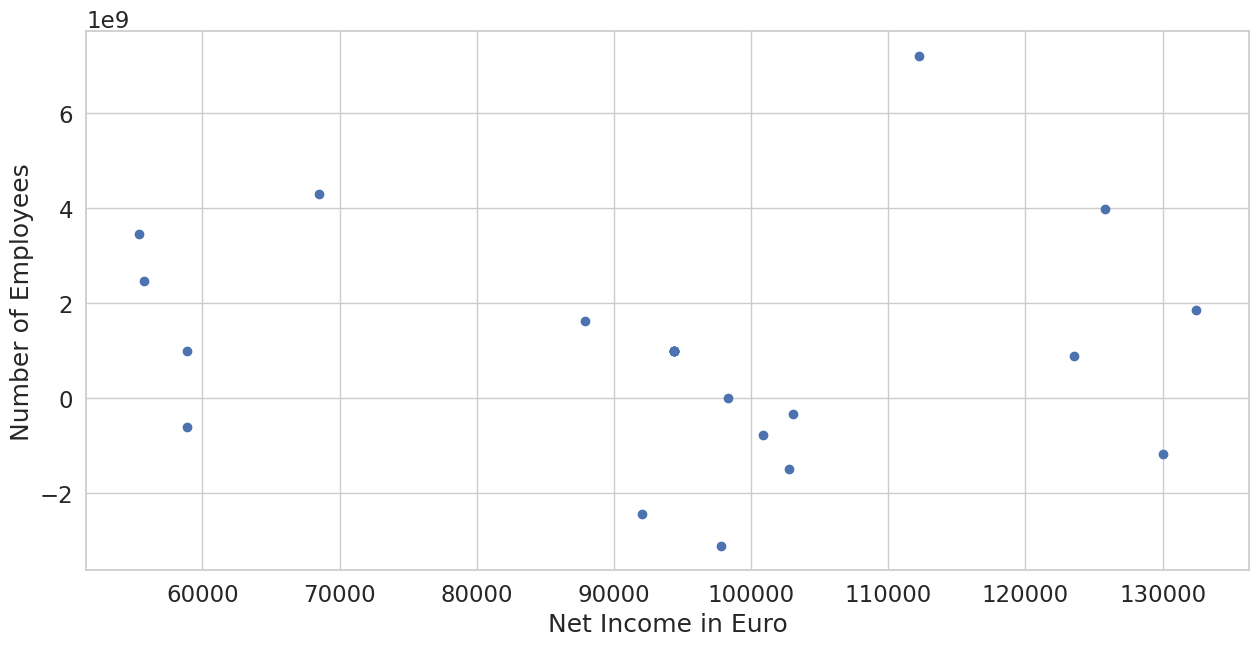

In [20]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Number of Employees'], dataset['Net Income in Euro'])
 
# x-axis label
ax.set_xlabel('Net Income in Euro')
 
# y-axis label
ax.set_ylabel('Number of Employees')
plt.show()

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

Untuk mengidentifikasi setiap outlier di kolom 'Number of Employees' dari dataset dapat menggunakan *syntax* berikut:



In [21]:
import sklearn

# IQR Number of Employees
Q1 = np.percentile(dataset['Number of Employees'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Number of Employees'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (23, 4)


Untuk mengidentifikasi setiap outlier di kolom 'Number of Employees' dari dataset dan menghapusnya untuk membuat kumpulan data baru yang dimodifikasi dapat menggunakan *syntax* berikut:



In [22]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Number of Employees'] > upper].index
outliers_lower = dataset[dataset['Number of Employees'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (14, 4)


Untuk mengidentifikasi setiap outlier di kolom 'Net Income in Euro' dari dataset dapat menggunakan *syntax* berikut:



In [23]:
import sklearn

# IQR Net Income in Euro
Q1 = np.percentile(dataset['Net Income in Euro'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['Net Income in Euro'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (14, 4)


Untuk mengidentifikasi setiap outlier di kolom 'Net Income in Euro' dari dataset dan menghapusnya untuk membuat kumpulan data baru yang dimodifikasi dapat menggunakan *syntax* berikut:



In [24]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['Net Income in Euro'] > upper].index
outliers_lower = dataset[dataset['Net Income in Euro'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (12, 4)


Untuk mengimport library seaborn dapat menggunakan *syntax* berikut:

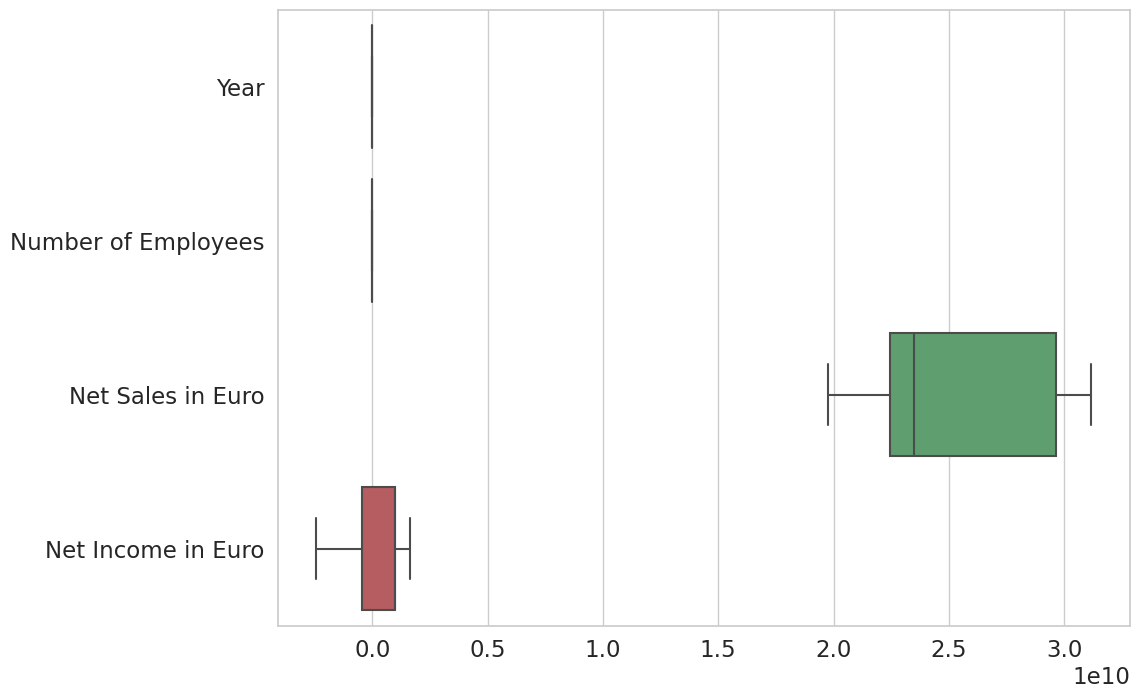

In [25]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

Untuk menampilkan scatter plot dari kolom dataset yang telah dihapus outliers nya, maka digunakanlah syntax berikut:

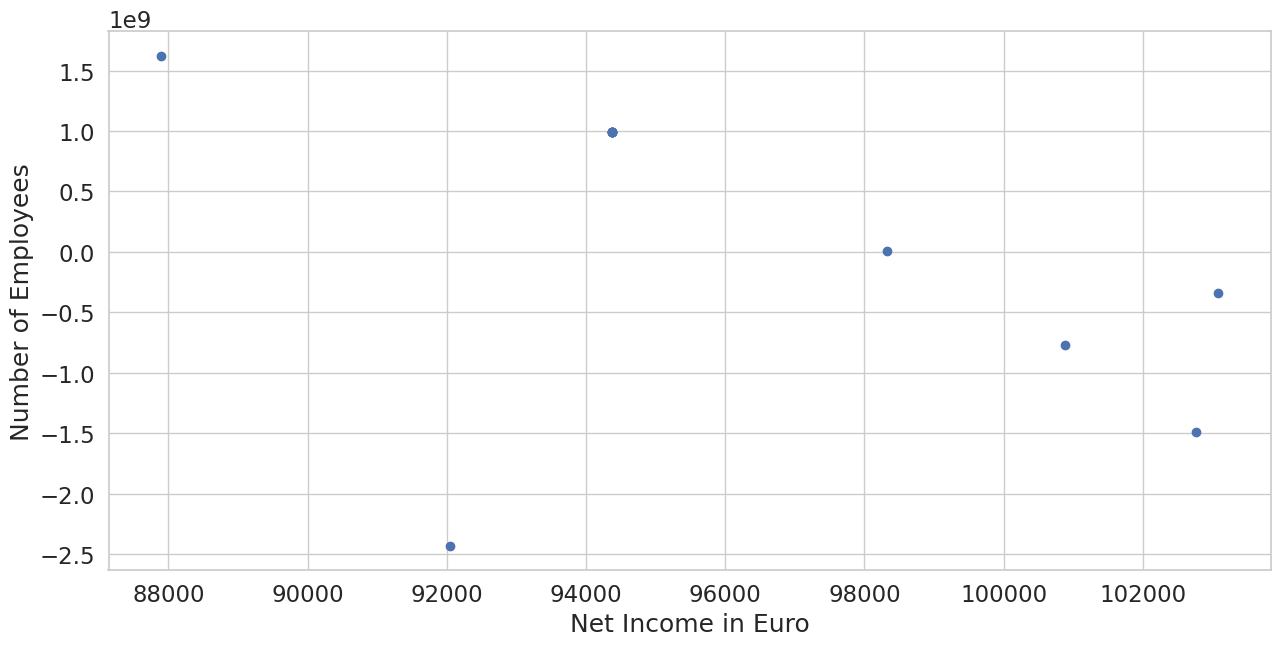

In [26]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['Number of Employees'], dataset['Net Income in Euro'])
 
# x-axis label
ax.set_xlabel('Net Income in Euro')
 
# y-axis label
ax.set_ylabel('Number of Employees')
plt.show()

Show data distribution based on density (kde - kernel density estimation)

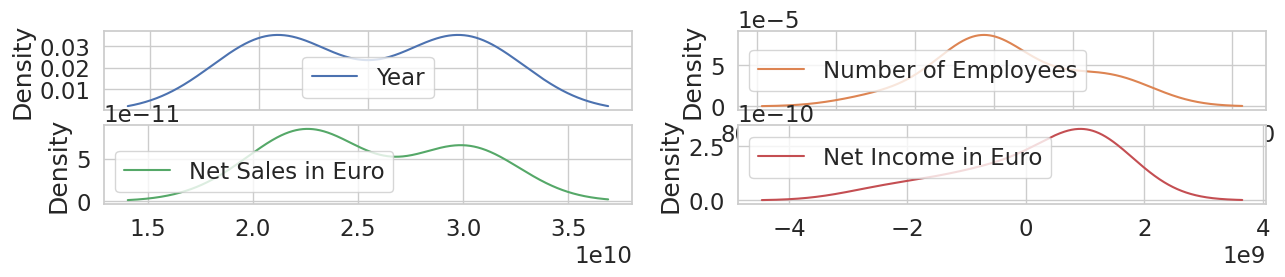

In [27]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Show data distribution based on histogram

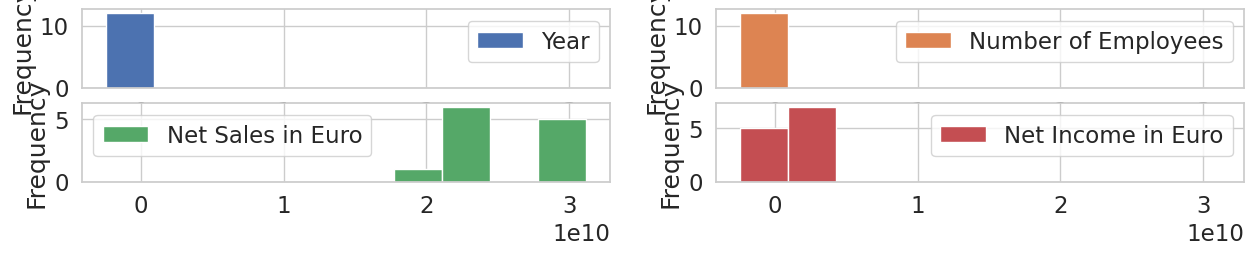

In [28]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

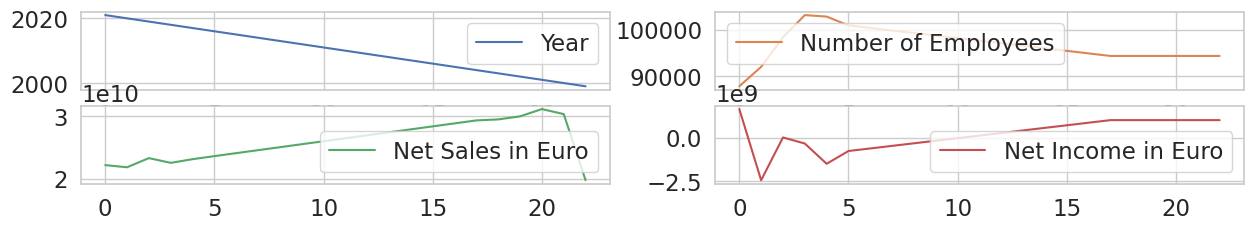

In [29]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

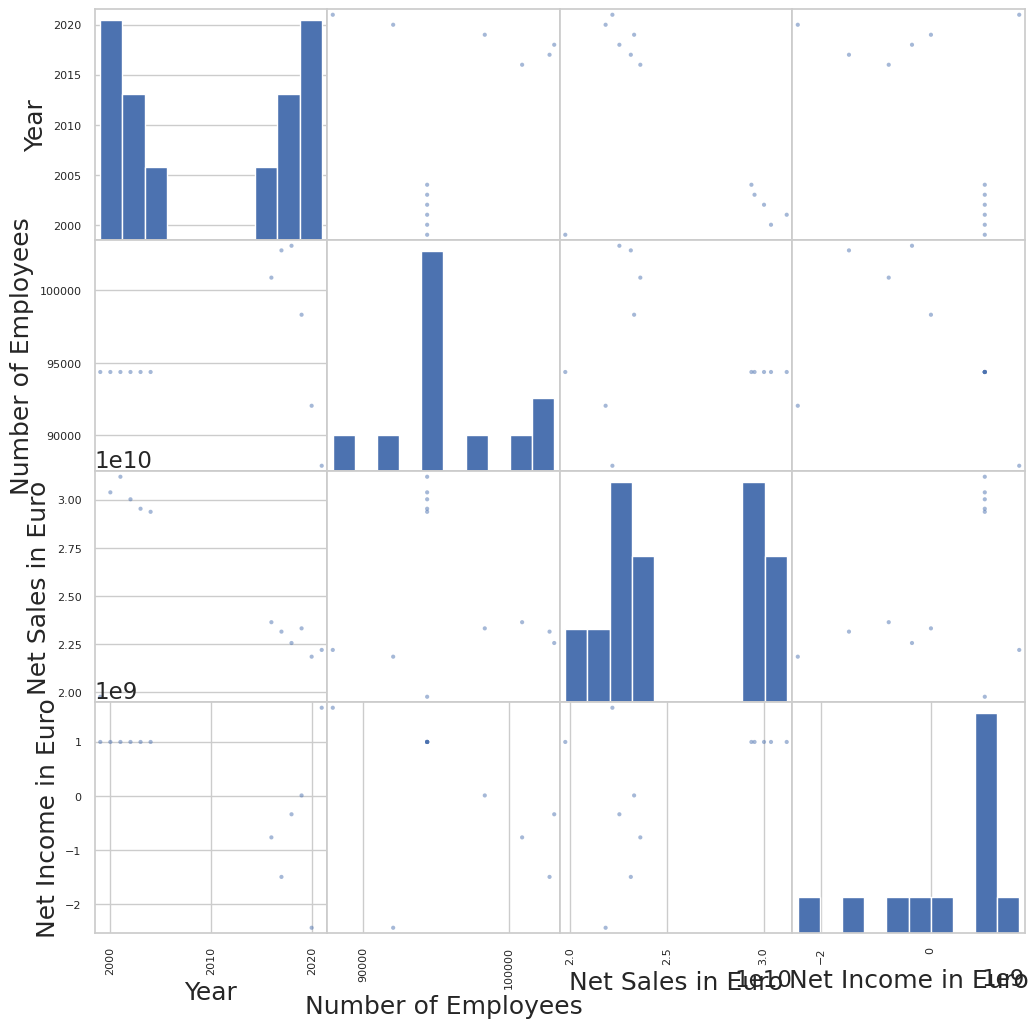

In [30]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

correlation matrix with heatmap

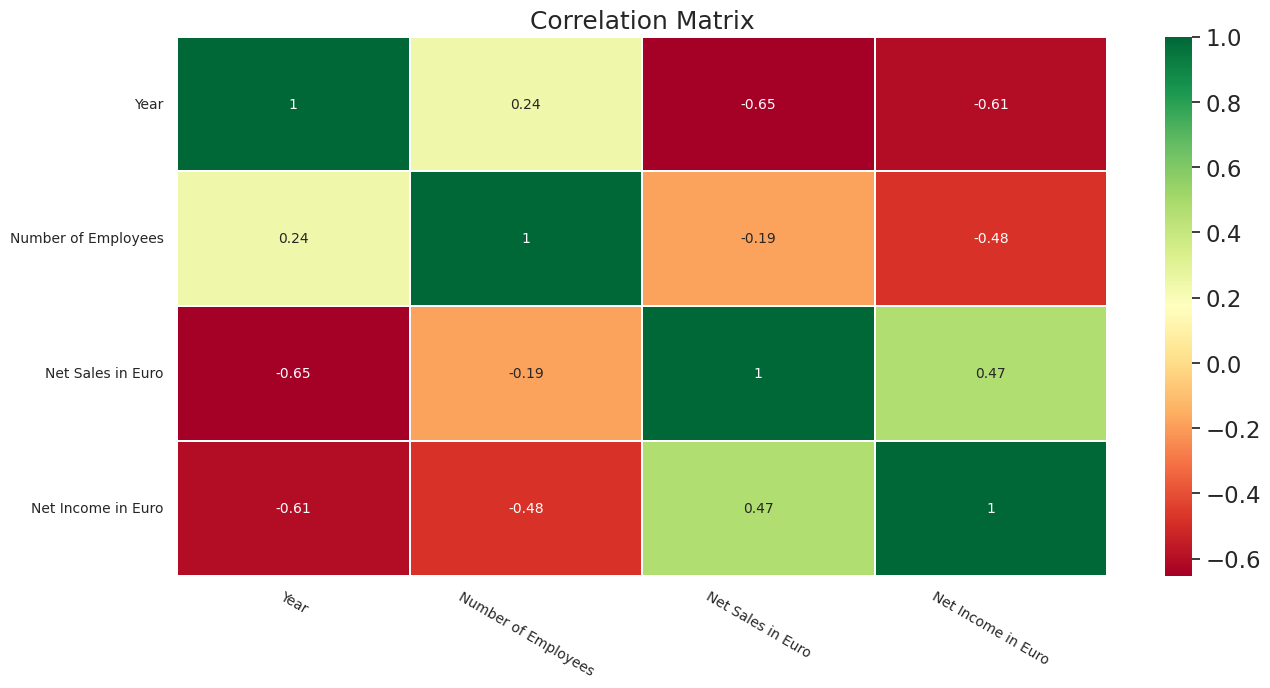

In [31]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

In [32]:
dataset3 = dataset

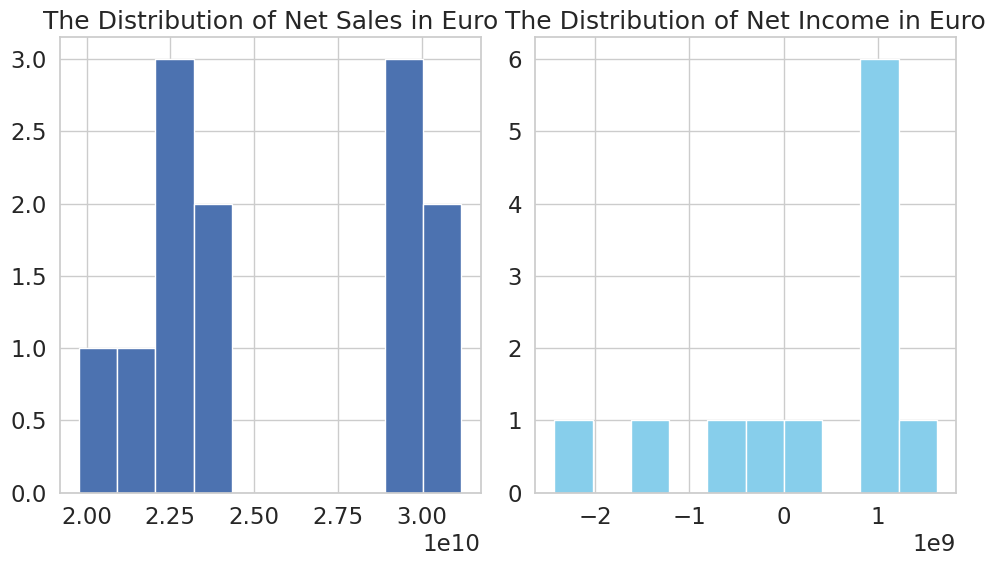

In [33]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(dataset3['Net Sales in Euro'])
ra1.set_title('The Distribution of Net Sales in Euro')

ra2.hist(dataset3['Net Income in Euro'], color = 'skyblue')
ra2.set_title('The Distribution of Net Income in Euro')

plt.tight_layout() 
plt.show()

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

In [34]:
x = dataset.drop('Number of Employees', axis=1)
x

,Year,Net Sales in Euro,Net Income in Euro
0,2021,22200000000,1.623000e+09
1,2020,21850000000,-2.431000e+09
2,2019,23320000000,7.000000e+06
3,2018,22560000000,-3.400000e+08
4,2017,23150000000,-1.494000e+09
5,2016,23640000000,-7.660000e+08
17,2004,29370000000,9.926875e+08
18,2003,29530000000,9.926875e+08
19,2002,30020000000,9.926875e+08
20,2001,31190000000,9.926875e+08


Choose feature Number of Employees as a label

In [35]:
y = dataset["Number of Employees"]
y

0      87900.000000
1      92040.000000
2      98320.000000
3     103080.000000
4     102760.000000
5     100880.000000
17     94368.823529
18     94368.823529
19     94368.823529
20     94368.823529
21     94368.823529
22     94368.823529
Name: Number of Employees, dtype: float64

In [36]:
y.values.reshape(-1,1)

array([[ 87900.        ],
       [ 92040.        ],
       [ 98320.        ],
       [103080.        ],
       [102760.        ],
       [100880.        ],
       [ 94368.82352941],
       [ 94368.82352941],
       [ 94368.82352941],
       [ 94368.82352941],
       [ 94368.82352941],
       [ 94368.82352941]])

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

In [37]:
x = pd.get_dummies(x)
x

,Year,Net Sales in Euro,Net Income in Euro
0,2021,22200000000,1.623000e+09
1,2020,21850000000,-2.431000e+09
2,2019,23320000000,7.000000e+06
3,2018,22560000000,-3.400000e+08
4,2017,23150000000,-1.494000e+09
5,2016,23640000000,-7.660000e+08
17,2004,29370000000,9.926875e+08
18,2003,29530000000,9.926875e+08
19,2002,30020000000,9.926875e+08
20,2001,31190000000,9.926875e+08


In [ ]:
x.shape

(13, 3)

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

In [38]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2
0,1.268762,-0.856228,1.190071
1,1.153420,-0.944846,-2.231417
2,1.038078,-0.572647,-0.173798
3,0.922736,-0.765077,-0.466658
4,0.807394,-0.615690,-1.440610
5,0.692052,-0.491624,-0.826193
6,-0.692052,0.959194,0.658101
7,-0.807394,0.999706,0.658101
8,-0.922736,1.123772,0.658101
9,-1.038078,1.420013,0.658101


**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


In [39]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2
0,1.000000,0.212785,1.000000
1,0.954545,0.182137,0.000000
2,0.909091,0.310858,0.601381
3,0.863636,0.244308,0.515787
4,0.818182,0.295972,0.231130
5,0.772727,0.338879,0.410705
6,0.227273,0.840630,0.844521
7,0.181818,0.854641,0.844521
8,0.136364,0.897548,0.844521
9,0.090909,1.000000,0.844521


**4.3 Splitting**

In [40]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
x,y = make_blobs(n_samples=1000)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=1,stratify=y)

In [41]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({0: 224, 1: 223, 2: 223})
Test distribution Counter({0: 110, 1: 110, 2: 110})


This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


In [1]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

In [2]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NameError: ignored

In [ ]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

LogisticRegression()

In [ ]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

1.0


[[110   0   0]
 [  0 110   0]
 [  0   0 110]]


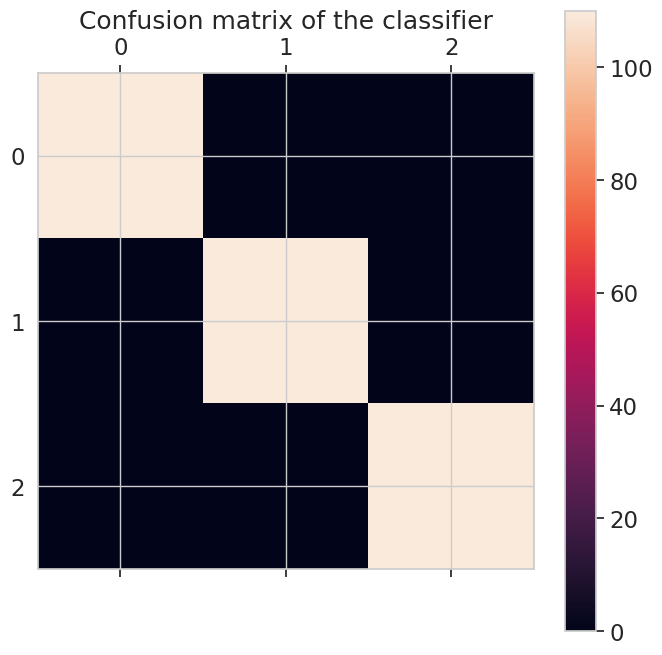

In [ ]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00       110
           2       1.00      1.00      1.00       110

    accuracy                           1.00       330
   macro avg       1.00      1.00      1.00       330
weighted avg       1.00      1.00      1.00       330

